In [ ]:
# CORS
## 🔥 NỖI ĐAU (Pain Point)
- Trước khi có CORS middleware, lập trình viên khổ sở thế nào?
- **Tình huống thực tế**:
  + Bạn làm backend API (chạy ở `http://localhost:3000`)
  + Bạn làm frontend (chạy ở `http://localhost:5173` - Vite/React)
  + Frontend gọi API → BÙM! Lỗi đỏ chói:
      > Access to fetch at `'http://localhost:3000/api/products'` 
      from origin `'http://localhost:5173'` has been blocked by CORS policy

- **Cách làm cũ (khổ sở vô cùng)**:
```javascript
// Phải tự viết middleware thủ công như thế này:
app.use((req, res, next) => {
  res.setHeader('Access-Control-Allow-Origin', '*'); 
  res.setHeader('Access-Control-Allow-Methods', 'GET, POST, PUT, DELETE');
  res.setHeader('Access-Control-Allow-Headers', 'Content-Type, Authorization');
  
  // Xử lý preflight request
  if (req.method === 'OPTIONS') {
    return res.sendStatus(200);
  }
  next();
});
```

- **Các vấn đề**:
1. ❌ Phải nhớ đủ các header CORS (dễ quên, dễ sai)
2. ❌ Phải tự xử lý preflight request (OPTIONS)
3. ❌ Muốn chặn domain cụ thể? → Phải viết logic kiểm tra thủ công
4. ❌ Muốn cho phép credentials (cookies)? → Phải config thêm
5. ❌ Code rất dài, dễ lỗi, khó maintain

In [ ]:
# GIẢI PHÁP (Solution)
- CORS middleware sinh ra để "chữa" cái khổ đó ra sao?
- CORS middleware = 1 dòng code, xong việc!
```javascript
// Thay vì 10+ dòng code phía trên, giờ chỉ cần:
const cors = require('cors');
app.use(cors()); // DONE! ✅
```
- **Nó giúp**:
	-  Tự động thêm tất cả CORS headers cần thiết
	-  Tự động xử lý preflight requests
	-  Config linh hoạt (cho phép tất cả, hoặc chỉ domain cụ thể)
	-  Hỗ trợ credentials, custom headers...
	- Code gọn, dễ đọc, dễ maintain

In [ ]:
# KHÁI NIỆM
**CORS middleware là gì?**
- Nó là một **middleware** (phần mềm trung gian) giúp Express tự động thêm các HTTP headers cần thiết để trình duyệt cho phép frontend từ domain khác gọi API của bạn.

**Tại sao nó xuất hiện?**
- Vì trình duyệt có chính sách bảo mật Same-Origin Policy (chỉ cho phép website gọi API cùng domain). CORS middleware giúp bạn nói với trình duyệt: **"Ê, tao cho phép frontend từ domain khác gọi API của tao đấy!"**

In [ ]:
# CÚ PHÁP
1. **Cho phép TẤT CẢ domain (dùng khi dev/test)**
```javascript
const cors = require('cors');
app.use(cors()); // Mọi domain đều gọi được
```

---

2. **Chỉ cho phép 1 domain cụ thể (production)**
```javascript
const corsOptions = {
  origin: 'https://mydomain.com' // Chỉ domain này được gọi
};
app.use(cors(corsOptions));
```

---

3. **Cho phép nhiều domain**
```javascript
const corsOptions = {
  origin: ['https://mydomain.com', 'https://anotherdomain.com']
};
app.use(cors(corsOptions));
```

---

4. **Dynamic origin (kiểm tra trong database)**
```javascript
const corsOptions = {
  origin: function (origin, callback) {
    // Kiểm tra origin (:5173) có trong whitelist không
    if (whitelist.includes(origin)) {
      callback(null, true); // Cho phép
    } else {
      callback(new Error('Not allowed by CORS')); // Chặn
    }
  }
};
app.use(cors(corsOptions));
```

---

5. **Cho phép credentials (cookies, auth headers)**
```javascript
const corsOptions = {
  origin: 'https://mydomain.com',
  credentials: true // Cho phép gửi cookies
};
app.use(cors(corsOptions));
```

---

## 🏪 ẨN DỤ (Analogy)

### Hình ảnh: **Bảo vệ Siêu Thị vs CORS Middleware**

**Tình huống:**
- **Backend API** = Siêu thị (có kho hàng)
- **Frontend** = Khách hàng (muốn mua hàng)
- **CORS Middleware** = Bảo vệ siêu thị
- **Same-Origin Policy** = Quy định: Chỉ khách từ khu vực này mới được vào

---

### 🚫 **KHÔNG có CORS middleware:**
```
Khách (Frontend từ domain khác): "Anh ơi, cho em vào mua hàng!"
Bảo vệ (Browser): "Không! Anh không có danh sách cho phép. Cút!"
```

> **Kết quả**: Frontend bị chặn, không gọi được API.

---

### ✅ CÓ CORS middleware - Cho phép TẤT CẢ:
`app.use(cors());` // = Bảo vệ nhận lệnh: "Ai cũng được vào!"
```
Khách (Frontend): "Anh ơi, cho em vào!"
Bảo vệ (CORS): "OK, vào đi! Tất cả đều được phép!"
```
> **Kết quả**: Mọi domain đều gọi được API.

---

### 🔒 CÓ CORS middleware - CHỈ cho phép domain cụ thể:
```javascript
const corsOptions = {
  origin: 'https://mydomain.com'
};
app.use(cors(corsOptions)); 
// = Bảo vệ có danh sách VIP
```

```
Khách A (mydomain.com): "Anh ơi, em là VIP đây!"
Bảo vệ (CORS): "Được, em có trong danh sách. Vào đi!"

Khách B (hackerdomain.com): "Anh ơi, cho em vào!"
Bảo vệ (CORS): "Không! Em không có trong danh sách. Cút!"
```

> **Kết quả**: Chỉ domain được phép mới gọi được API.

---

### 🍪 Cho phép Credentials (cookies):
```javascript
const corsOptions = {
  origin: 'https://mydomain.com',
  credentials: true // Cho phép mang đồ vào
};
app.use(cors(corsOptions));
```
```
Khách VIP: "Anh ơi, em mang theo thẻ thành viên (cookie) được không?"
Bảo vệ (CORS): "Được! Em là VIP, mang vào thoải mái!"

Khách lạ: "Anh ơi, em mang thẻ vào được không?"
Bảo vệ (CORS): "Không! Em không có trong danh sách VIP!"
```

In [ ]:
/* Cấu hình CORS middleware */
app.use(
    cors({
        origin: (origin, callback) => {
            // Cho phép các request không có origin
            if (!origin || allowOrigins.includes(origin)) {
                callback(null, true);
            } else {
                callback(new Error("Not allowed by CORS"));
            }
        },
        methods: ["GET", "POST", "PUT", "DELETE", "OPTIONS"],
        optionsSuccessStatus: 200, // Trả về 200 cho Preflight request
    }),
);

In [ ]:
# PHÂN TÍCH TỪNG PHẦN
1. **origin: (origin, callback) => { ... }** - Kiểm tra nguồn gốc
```javascript
origin: (origin, callback) => {
    if (!origin || allowOrigins.includes(origin)) {
        callback(null, true);
    } else {
        callback(new Error("Not allowed by CORS"));
    }
}
```

#### 🎯 Ý nghĩa:
- **`origin`**: Domain của frontend đang gọi API (ví dụ: `https://myapp.com`)
- **`callback(null, true)`**: Cho phép request này
- **`callback(new Error(...))`**: Chặn request này

#### 🧩 Luồng hoạt động:
```
┌─────────────────────────────────────────────────┐
│ Frontend gửi request                            │
│ Origin: https://myapp.com                       │
└──────────────────┬──────────────────────────────┘
                   │
                   ▼
┌─────────────────────────────────────────────────┐
│ CORS middleware kiểm tra                        │
│ 1. origin có tồn tại không?                     │
│ 2. origin có trong allowOrigins không?          │
└──────────────────┬──────────────────────────────┘
                   │
        ┌──────────┴──────────┐
        ▼                     ▼
    ✅ Có                  ❌ Không
callback(null, true)    callback(Error)
Cho phép request       Chặn request
```

#### 🏪 Ẩn dụ:
```
Bảo vệ siêu thị (CORS middleware) cầm danh sách VIP (allowOrigins):

Khách A: "Anh ơi, em đến từ https://myapp.com"
Bảo vệ: *Xem danh sách* "Có! Em vào đi!" → callback(null, true)

Khách B: "Anh ơi, em đến từ https://hacker.com"
Bảo vệ: *Xem danh sách* "Không có! Cút!" → callback(Error)

Khách C: (Không nói gì - !origin)
Bảo vệ: "À, em là khách nội bộ (Postman/curl)? Vào đi!" → callback(null, true)
```

In [ ]:
### 2. `!origin` - Cho phép request không có origin
```javascript
if (!origin || allowOrigins.includes(origin))
```

#### 🎯 Tại sao có `!origin`?

**Các trường hợp `origin` = `undefined` (không có origin):**
1. ✅ **Postman, Insomnia, curl** - Testing tools
2. ✅ **Server-to-server** - Backend gọi backend khác
3. ✅ **Mobile apps (native)** - React Native, Flutter...

#### ⚠️ Lưu ý:
- Trình duyệt **LUÔN** gửi `origin` header
- Chỉ có tools/servers/mobile apps mới không có `origin`
- Cho phép `!origin` = Cho phép test API dễ dàng

#### 🏪 Ẩn dụ:
```
Khách không mang bảng tên (không có origin):

Bảo vệ: "Em là ai? Đến từ đâu?"
Khách: "Em là shipper/thợ sửa (Postman/curl), không cần bảng tên"
Bảo vệ: "OK, vào đi! Anh tin em!" → callback(null, true)
```

In [ ]:
### 3. `methods: ["GET", "POST", "PUT", "DELETE", "OPTIONS"]` - Cho phép các phương thức HTTP

```javascript
methods: ["GET", "POST", "PUT", "DELETE", "OPTIONS"]
```

#### 🎯 Ý nghĩa:
- Chỉ cho phép frontend dùng **5 phương thức này**
- Nếu frontend gọi `PATCH`? → **Bị chặn!**

#### 🏪 Ẩn dụ:
```
Siêu thị có 5 cửa vào (5 methods):

Khách: "Em muốn vào cửa GET (lấy hàng)"
Bảo vệ: "Được! Cửa này mở!" → Cho phép

Khách: "Em muốn vào cửa PATCH (sửa hàng)"
Bảo vệ: "Không! Cửa này đóng!" → Chặn
```


In [ ]:
### Thực tế:
```javascript
// Frontend gọi:
fetch('http://localhost:3000/api/users', {
  method: 'POST' // ✅ Được phép
});

fetch('http://localhost:3000/api/users', {
  method: 'PATCH' // ❌ Bị chặn (vì không có trong danh sách)
});
```

In [ ]:
### 4. optionsSuccessStatus: 200 - Trả về 200 cho Preflight request
`optionsSuccessStatus: 200`

####  Preflight request là gì?
**Khi nào trình duyệt gửi Preflight?**
- Khi frontend dùng method khác `GET/HEAD/POST`
- Khi frontend gửi `custom headers` (ví dụ: Authorization)
- Khi frontend gửi `Content-Type` khác application/x-www-form-urlencoded, multipart/form-data, text/plain

#### Preflight request:
```http
OPTIONS /api/users HTTP/1.1
Origin: https://myapp.com
Access-Control-Request-Method: DELETE
Access-Control-Request-Headers: Authorization
```

### Response:
HTTP/1.1 200 OK  ← optionsSuccessStatus: 200
Access-Control-Allow-Origin: https://myapp.com
Access-Control-Allow-Methods: GET, POST, PUT, DELETE, OPTIONS

#### 🏪 Ẩn dụ:
```
Khách muốn mang đồ lớn vào siêu thị (DELETE request + Authorization header):

Khách: "Anh ơi, em có thể mang cái bàn này vào không?" 
      (Gửi OPTIONS - Preflight request)

Bảo vệ: "Được! Em mang vào!" 
      (Trả về 200 - optionsSuccessStatus: 200)

Khách: *Mang bàn vào* 
      (Gửi DELETE request thật)
```

#### ⚠️ Tại sao dùng 200 thay vì 204?
- `optionsSuccessStatus: 200` // Vì một số trình duyệt cũ (IE11, Smart TV) không hiểu 204


In [ ]:
- **204 No Content**: Mặc định của CORS (chuẩn HTTP)
- **200 OK**: Dùng cho trình duyệt cũ/Smart TV (an toàn hơn)

---

## 🎯 TỔNG HỢP LUỒNG HOẠT ĐỘNG

### Scenario 1: **Frontend gọi GET (simple request)**
```
1. Frontend (https://myapp.com) gửi:
   GET /api/users
   Origin: https://myapp.com

2. CORS middleware kiểm tra:
   ✅ origin = "https://myapp.com" → có trong allowOrigins
   ✅ method = "GET" → có trong methods
   
3. Backend trả về:
   200 OK
   Access-Control-Allow-Origin: https://myapp.com
   Data: [...]
```

---

### Scenario 2: **Frontend gọi DELETE (preflight request)**
```
BƯỚC 1: Preflight request (tự động gửi bởi trình duyệt)
────────────────────────────────────────────────────
Frontend gửi:
  OPTIONS /api/users/123
  Origin: https://myapp.com
  Access-Control-Request-Method: DELETE

CORS middleware kiểm tra:
  ✅ origin → OK
  ✅ method DELETE → có trong methods
  
Backend trả về:
  200 OK ← optionsSuccessStatus: 200
  Access-Control-Allow-Origin: https://myapp.com
  Access-Control-Allow-Methods: GET, POST, PUT, DELETE, OPTIONS


BƯỚC 2: Request thật
────────────────────────────────────────────────────
Frontend gửi:
  DELETE /api/users/123
  Origin: https://myapp.com
  
Backend trả về:
  200 OK
  Access-Control-Allow-Origin: https://myapp.com
  Message: "User deleted"
```

---

### Scenario 3: **Hacker gọi từ domain lạ**
```
1. Hacker (https://evil.com) gửi:
   GET /api/users
   Origin: https://evil.com

2. CORS middleware kiểm tra:
   ❌ origin = "https://evil.com" → KHÔNG có trong allowOrigins
   
3. Backend trả về:
   Error: "Not allowed by CORS"
   
4. Trình duyệt chặn:
   Console: ❌ CORS error: Not allowed by CORS
```

---

### Scenario 4: **Postman test API (không có origin)**
```
1. Postman gửi:
   GET /api/users
   (Không có Origin header)

2. CORS middleware kiểm tra:
   ✅ !origin → Cho phép (vì là testing tool)
   
3. Backend trả về:
   200 OK
   Data: [...]

In [ ]:
#### 🎯 THỰC TẾ ÁP DỤNG
File config thực tế:
```javascript
// config/cors.js
const allowOrigins = [
    'http://localhost:5173',        // Vite dev
    'http://localhost:3001',        // React dev
    'https://myapp.com',            // Production web
    'https://admin.myapp.com',      // Admin panel
];

app.use(
    cors({
        origin: (origin, callback) => {
            // Cho phép: Postman, mobile apps, server-to-server
            if (!origin) {
                return callback(null, true);
            }
            
            // Cho phép: Origins trong whitelist
            if (allowOrigins.includes(origin)) {
                return callback(null, true);
            }
            
            // Chặn: Origins lạ
            callback(new Error(`Origin ${origin} not allowed by CORS`));
        },
        methods: ["GET", "POST", "PUT", "DELETE", "OPTIONS"],
        optionsSuccessStatus: 200,
        credentials: true, // 👈 Thêm này nếu dùng cookies/auth
    }),
);
```

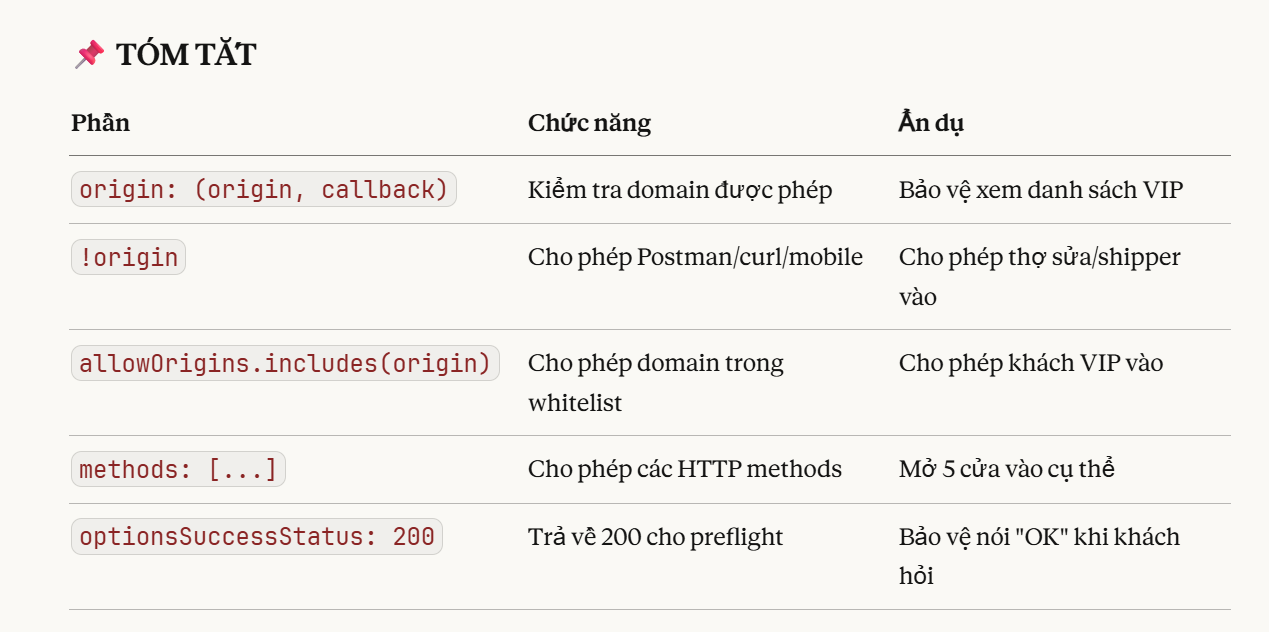